In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

import math

# Kuramoto model
$$ \dot \varphi_i = \omega_i + \frac K N \sum_{j=1}^N{a_{ij}}\sin(\varphi_j - \varphi_i)$$

In [30]:
#define all needed variables
N = 10
phi = np.zeros(N)
omega = np.random.uniform(low=-1, high=1, size=(N**2))
# omega = omega**3 - 0.3*omega
K = 10

def make_A(N):
    #make an adjaceny matrix for an NxN systems where neighbors are connected. 
    #periodic boundary conditions
    
    #this is super messy, maybe make clearer. 
    
    
    A = np.zeros((N**2,N**2))
    #handle corners
    #top left
    A[0,1] = 1
    A[0,N-1] = 1
    A[0,N] = 1
    A[0, N**2 - N] = 1
    #bottom left
    A[N-1,0] = 1
    A[N-1,N-2] = 1
    A[N-1,N**2 - 1] = 1
    A[N-1, 2*N-1] = 1
#     top right
    A[ N**2 - N,  N**2 - N+1] = 1
    A[ N**2 - N, N**2 - 1] = 1
    A[ N**2 - N, 0] = 1
    A[ N**2 - N,  N**2 - 2*N] = 1
    #bottom right
    A[ N**2 - 1,  N**2 - N] = 1
    A[ N**2 - 1, N**2 - 2] = 1
    A[ N**2 - 1, N**2 - N-1] = 1
    A[ N**2 - 1,  N-1] = 1
    
    #first column
    for i in range(1, N-1):
        A[i, i + N] = 1
        A[i, N**2 - N + i] = 1
        A[i, i + 1] = 1
        A[i, i - 1] = 1
    #first column
    for i in range(1, N-1):
        A[N**2 - N + i, N**2 - N + i+1] = 1
        A[N**2 - N + i, N**2 - N + i-1] = 1
        A[N**2 - N + i, N**2 - 2*N + i] = 1
        A[N**2 - N + i, i] =1
    #first row
    for i in range(1, N-1):
        A[i*N, (i-1)*N] = 1
        A[i*N, (i+1)*N] = 1
        A[i*N, i*N + 1] = 1
        A[i*N, (i+1)*N - 1] = 1
    #last row
    for i in range(2, N):
        A[i*N-1, i*N-2] = 1
        A[i*N-1, i*N-N] = 1
        A[i*N-1, (i-1)*N-1] = 1
        A[i*N-1, (i+1)*N-1] = 1
    #middles
    for i in range(N+1, N**2-N-1):
        if(i%N != N-1) and (i%N != 0):
            A[i, i+1] = 1
            A[i, i-1] = 1
            A[i, i-N] = 1
            A[i, i+N] = 1
    return A

# A = np.ones((N,N)) - np.eye(N) #this is all to all right now, but want to make it so you can set the number of connections
A = make_A(N)
# print(np.sum(A)/((N**2-1)**2))
# plt.figure()
# plt.imshow(A)
dt = 0.01 #timestep size, if this is too large, weird things seem to be happening
T_max = 100. #maximum time to run simulation for
t = np.arange(0, T_max, dt)
# print(t.shape)

In [3]:
def phi_dot(phi, t, omega, K, A):
    #this is for the Kuramoto oscillator
    N = len(phi)
    dphi_dt = np.zeros(np.shape(phi))
    for i in range(N):
        dphi_dt[i] = (omega[i] + K/N *np.sum(A[i]@np.sin(phi - phi[i])))#+ np.random.normal(0,0.01)
    return dphi_dt

def run_and_graph(omega, K=10, T_max =20, dt = 0.01, p = 1, N = 100):
    plt.figure()
#     if A is None:
    A = make_A(N, p = p)
    sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
    for i in range(min(10, N)):
        plt.plot(np.arange(0, T_max, dt), sol[:,i])
    plt.plot(np.linspace(0,T_max), np.linspace(0,T_max)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)
    plt.xlabel("time")
    plt.ylabel("solution value ")
    plt.title("first 10 phases with p = "+ str(p))
    plt.show()

In [57]:
#do the integration part
start = np.random.uniform(0,1,size = (N**2))
sol1 = odeint(phi_dot, start, t, args=(omega, K, A))
sol2 = odeint(phi_dot, start, t, args=(omega, K*2, A))
sol4 = odeint(phi_dot, start, t, args=(omega, K*4, A))
sol8 = odeint(phi_dot, start, t, args=(omega, K*8, A))
sol16 = odeint(phi_dot, start, t, args=(omega, K*16, A))

<IPython.core.display.Javascript object>


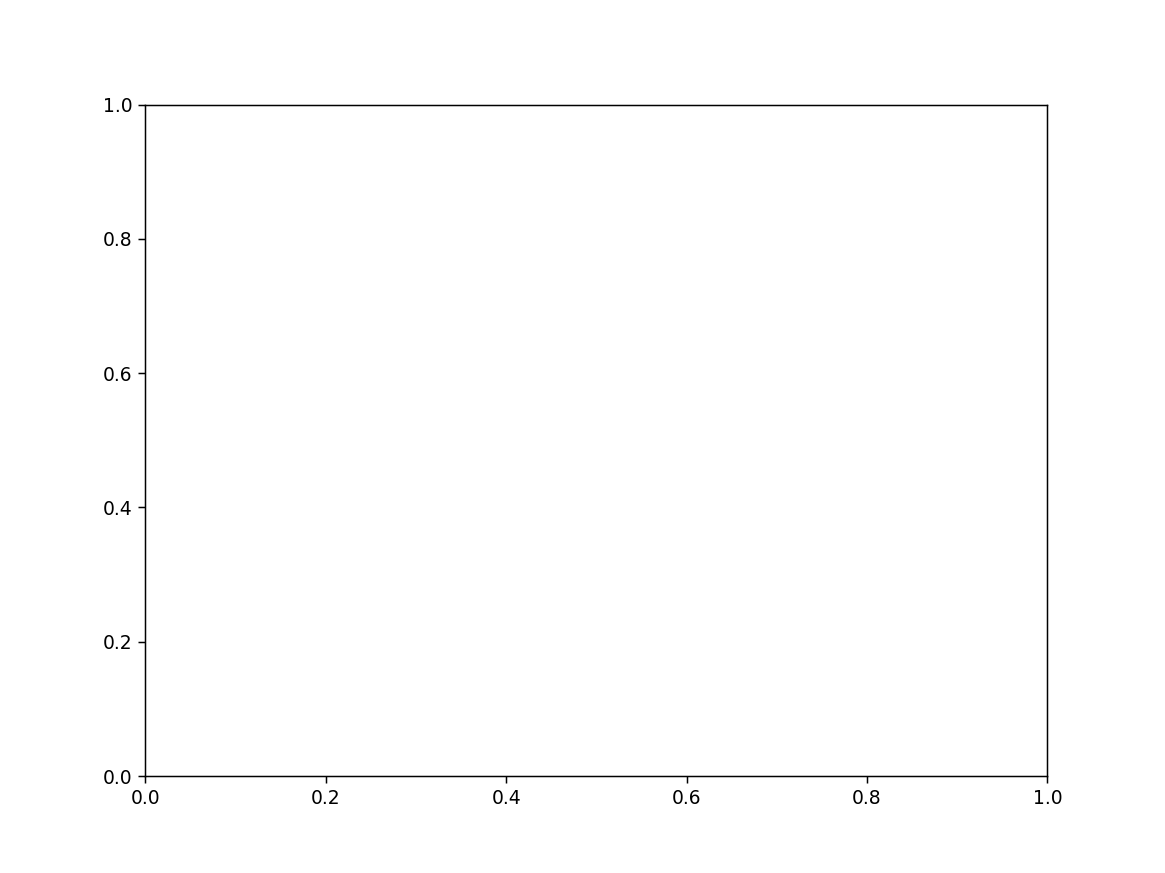

<IPython.core.display.Javascript object>

2000
done


In [5]:
%matplotlib notebook
#got this example from http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
#animating the solution over time
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes()

vmin = -1
vmax = 1
speed = 4

# x = np.sin(sol[0,:].reshape(N, -1).T)
# im = plt.imshow(x, interpolation='none', vmin=vmin, vmax=vmax)

fig, axs = plt.subplots(2, 2)
# for ax, interp in zip(axs, ['nearest', 'bilinear', 'bicubic']):
x = np.sin(sol1[0,:].reshape(N, -1).T)
im1 = axs[0, 0].imshow(x, interpolation='none', vmin=vmin, vmax=vmax)

x = np.sin(sol2[0,:].reshape(N, -1).T)
im2 = axs[0, 1].imshow(x, interpolation='none', vmin=vmin, vmax=vmax)

x = np.sin(sol4[0,:].reshape(N, -1).T)
im4 = axs[1, 0].imshow(x, interpolation='none', vmin=vmin, vmax=vmax)

x = np.sin(sol8[0,:].reshape(N, -1).T)
im8 = axs[1,1].imshow(x, interpolation='none', vmin=vmin, vmax=vmax)

# plt.clim(vmin=vmin, vmax=vmax)
# plt.colorbar()
# plt.title("0")
axs[0,0].set_title("K = "+str(K))
axs[0,1].set_title("K = "+str(2*K))
axs[1,0].set_title("K = "+str(4*K))
axs[1, 1].set_title("K = "+str(8*K))
title = axs[0,0].text(0.5,0.85, "", bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},
                transform=ax.transAxes, ha="center")

# # # initialization function: plot the background of each frame
# def init():
#     fig = plt.figure()

#     x = np.sin(sol[0,:].reshape(N, -1).T)
#     im = plt.imshow(x, interpolation='none', vmin=vmin, vmax=vmax)
#     plt.clim(vmin=vmin, vmax = vmax)
#     plt.colorbar()
#     im.set_array(sol[0,:].reshape(N, -1).T)
#     return im

t_list = np.arange(0, T_max, dt)
# # animation function.  This is called sequentially
def animate(i):
    
    x = np.sin(sol1[i*speed,:].reshape(N, -1).T)
    im1.set_data(x)

    x = np.sin(sol2[i*speed,:].reshape(N, -1).T)
    im2.set_data(x)

    x = np.sin(sol4[i*speed,:].reshape(N, -1).T)
    im4.set_data(x)

    x = np.sin(sol8[i*speed,:].reshape(N, -1).T)
    im8.set_data(x)


#     x = np.sin(sol[i*2,:].reshape(N, -1).T)
#     im.set_data(x)
    title.set_text('t = {0:.{1}f}'.format(t_list[i*speed], 2))
    return im1, im2, im4, im8, title

(n_time, n_i) = sol1.shape

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, save_count=int(n_time/speed))#,init_func = init
#                                frames=200, interval=20, blit=True)

# save the animation 

print(n_time)

writergif = animation.PillowWriter(fps=30)
anim.save("Kuramoto_2d_4_values_T_"+str(int(T_max))+"_k_"+str(K)+'.gif', writer=writergif)#, fps=30)


fig.show()

print("done")

0.27332144554583504
-0.08732877535623096


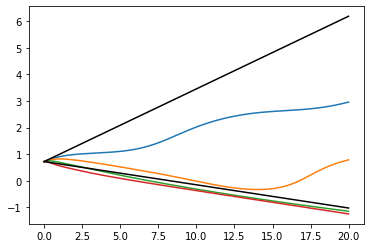

In [22]:
%matplotlib inline
i = 25
plt.plot(t, sol1[:,i])
plt.plot(t, sol2[:,i])
plt.plot(t, sol4[:,i])
plt.plot(t, sol8[:,i])
print(omega[i])
print(np.mean(omega))

plt.plot(t, omega[i]*t + sol1[0,i], 'black')
plt.plot(t, np.mean(omega)*t + sol1[0,i], 'black')
plt.show()

0.27332144554583504
-0.08732877535623096


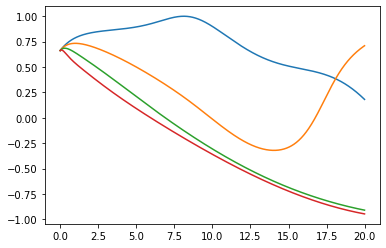

In [23]:
%matplotlib inline
i = 25
plt.plot(t, np.sin(sol1[:,i]))
plt.plot(t, np.sin(sol2[:,i]))
plt.plot(t, np.sin(sol4[:,i]))
plt.plot(t, np.sin(sol8[:,i]))
print(omega[i])
print(np.mean(omega))

# plt.plot(t, omega[i]*t + sol1[0,i], 'black')
# plt.plot(t, np.mean(omega)*t + sol1[0,i], 'black')
plt.show()

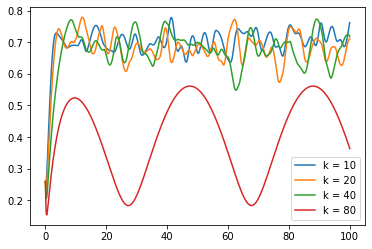

In [33]:
#looking at how the std changes with time for the different levels of sychonization
#I was thinking that as the oscialltors get schronized, the std would decrease. 
std = np.std(np.sin(sol1), axis = 1)
plt.plot(t, std, label = "k = "+str(K))
plt.plot(t, np.std(np.sin(sol2), axis = 1), label = "k = "+str(2*K))
plt.plot(t, np.std(np.sin(sol4), axis = 1), label = "k = "+str(4*K))
plt.plot(t, np.std(np.sin(sol8), axis = 1) ,label = "k = "+str(8*K))
plt.legend()


0.1149308041131039
0.15032697546418988
0.12442690071088071
0.9585096838999079
0.9585096838999079
0.013157493160765865
0.9716671770606737
0.006554002819287197
0.9782211798799609
0.002113554706165144
0.9803347345861261
0.0008254072716461502
0.9795093273144799
0.0027655342887646928
0.9767437930257152
0.004052950616713624
0.9726908424090016
0.004915383753361202
0.9677754586556404
0.005499829208363449
0.962275629447277
0.00590071911273371
0.9563749103345432
0.006178921945979687
0.9501959883885636
0.006373991696893233
0.9438219966916703
0.00651191515100813
0.9373100815406622
0.006609984440514416
0.9307000971001478
0.006679866013264202
0.9240202310868836
0.00672954543995774
0.9172906856469258
0.006764570248877
0.9105261153980488
0.006788853038527498
0.9037372623595213
0.006805193447735114
0.8969320689117862
0.006815625198772768
0.8901164437130135
0.006821646692185546
0.8832947970208279
0.006824377324525122
0.8764704196963028
0.006824664824453319
0.8696457548718495
0.006823159433071657
0.86282

0.005364216306239067
0.3293677775957857
0.006007398706977196
0.32336037888880853
0.006673385685178945
0.3166869932036296
0.007329832188100294
0.3093571610155293
0.007942883991919225
0.30141427702361007
0.008480023976113749
0.2929342530474963
0.008914147587258392
0.2840201054602379
0.009228046757903119
0.2747920587023348
0.009417417407493134
0.2653746412948417
0.009490394291051862
0.2558842470037898
0.009462937296998042
0.24642130970679177
0.009351614018741544
0.23706969568805022
0.00916696162119629
0.22790273406685393
0.00891074951537707
0.21899198455147686
0.008578941281033287
0.21041304327044358
0.008169529250355356
0.20224351402008822
0.0076913853210029415
0.19455212869908528
0.007168746571796836
0.18738338212728844
0.0066380011887421375
0.1807453809385463
0.006138371367634676
0.17460700957091163
0.00570177137164532
0.1689052381992663
0.005346463229468579
0.16355877496979773
0.005075638360981294
0.15848313660881644
0.00487925945636547
0.15360387715245097
0.004736971152509789
0.14886

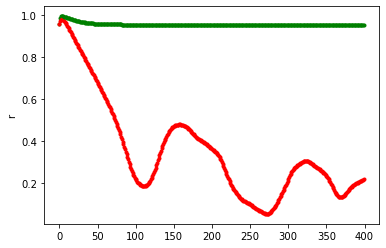

In [69]:
#level of synchronisation is the r thing given in equation 2.2 of that paper. 
# print(len(sol1[0]))
print(abs(np.sum(math.e**(sol1[-1,:]*1j)))/len(sol1[0]))

print(abs(np.sum(math.e**(sol2[-1,:]*1j)))/len(sol1[0]))

print(abs(np.sum(math.e**(sol4[-1,:]*1j)))/len(sol1[0]))

epsilon = 1e-4

last = 0
count = 0
for i in range(400):#int(len(sol8)/10)):
    plt.plot(i, abs(np.sum(math.e**(sol16[i*10,:]*1j)))/len(sol1[0]), '.g')
    x = abs(np.sum(math.e**(sol4[i*10,:]*1j)))/len(sol1[0])
    print(np.abs(x - last))
    if(np.abs(x - last) < epsilon):
        count += 1
        if(count >= 10):
            print("converged!!")
            print(i)
            break
    else:
        count = 0
    last = x
    print(x)
    plt.plot(i, x, '.r')
#     plt.plot(i, abs(np.sum(math.e**(sol4[i*10,:]*1j)))/len(sol1[0]), '.b')
#     plt.plot(i, abs(np.sum(math.e**(sol2[i*10,:]*1j)))/len(sol1[0]), '.', color = "green")
#     plt.plot(i, abs(np.sum(math.e**(sol1[i*10,:]*1j)))/len(sol1[0]), '.', color = "yellow")
    

plt.ylabel("r")    
plt.show()